In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("cars (1).csv")
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114,23,28,16845
201,-1,95,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160,19,25,19045
202,-1,95,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134,18,23,21485
203,-1,95,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106,26,27,22470


In [5]:
df["normalized-losses"].replace("?",np.nan,inplace=True)
df["horsepower"].replace("?",np.nan,inplace=True)

In [6]:
df["normalized-losses"]=df["normalized-losses"].astype("float")
df["horsepower"]=df["horsepower"].astype("float")

In [7]:
from sklearn.impute import SimpleImputer

In [8]:
si = SimpleImputer(strategy="mean")

In [9]:
df[["normalized-losses","horsepower"]]=si.fit_transform(df[["normalized-losses","horsepower"]])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(4), int64(5), object(6)
memory usage: 24.1+ KB


<AxesSubplot:xlabel='price'>

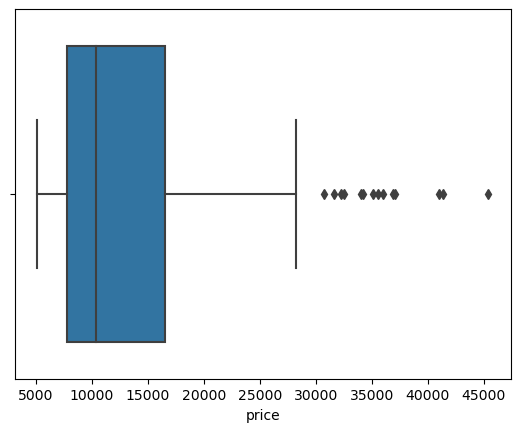

In [13]:
sns.boxplot(data=df,x="price")

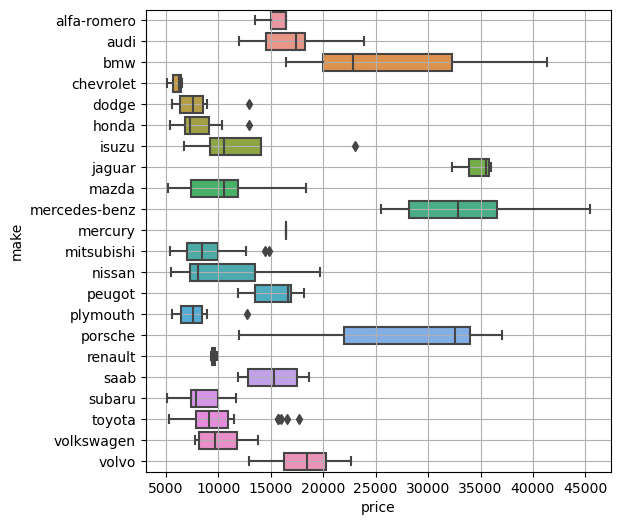

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

In [15]:
df[(df.make=="dodge") & (df.price>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
29,3,145.0,dodge,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,12964


In [16]:
df.drop(29,axis=0,inplace=True)

In [17]:
df[(df.make=="honda") & (df.price>12000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
41,0,85.0,honda,gas,sedan,fwd,front,65.2,54.1,ohc,110,101.0,24,28,12945


In [18]:
df.drop(41,axis=0,inplace=True)

In [19]:
df[(df.make=="isuzu") & (df.price>20000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
45,0,122.0,isuzu,gas,sedan,fwd,front,63.6,52.0,ohc,90,70.0,38,43,23000


In [20]:
df.drop(45,axis=0,inplace=True)

In [21]:
df[(df.make=="mitsubishi") & (df.price>14000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
83,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14869
84,3,122.0,mitsubishi,gas,hatchback,fwd,front,66.3,50.2,ohc,156,145.0,19,24,14489


In [22]:
df.drop([83,84],axis=0,inplace=True)

In [23]:
df[(df.make=="plymouth") & (df.price>10000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
124,3,122.0,plymouth,gas,hatchback,rwd,front,66.3,50.2,ohc,156,145.0,19,24,12764


In [24]:
df.drop(124,axis=0,inplace=True)

In [25]:
df[(df.make=="toyota") & (df.price>15000)]

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
172,2,134.0,toyota,gas,convertible,rwd,front,65.6,53.0,ohc,146,116.0,24,30,17669
178,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,20,24,16558
179,3,197.0,toyota,gas,hatchback,rwd,front,67.7,52.0,dohc,171,161.0,19,24,15998
180,-1,90.0,toyota,gas,sedan,rwd,front,66.5,54.1,dohc,171,156.0,20,24,15690
181,-1,122.0,toyota,gas,wagon,rwd,front,66.5,54.1,dohc,161,156.0,19,24,15750


In [26]:
df.drop([172,178,179,180,181],axis=0,inplace=True)

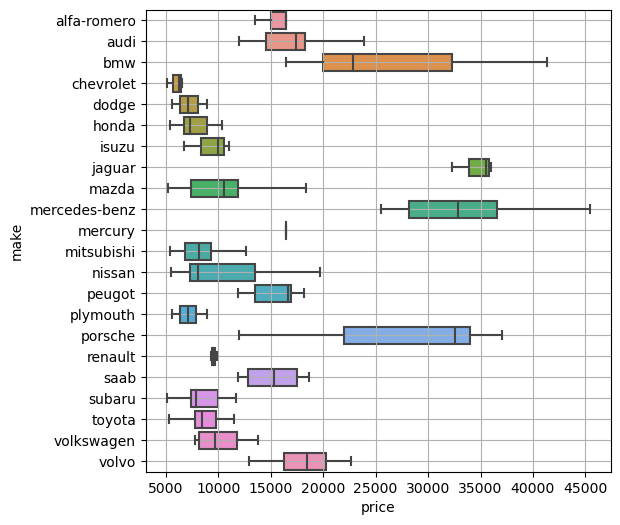

In [27]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df,x="price",y="make")
plt.grid()

In [28]:
colname=df.select_dtypes(["int64","float64"]).columns

In [29]:
colname

Index(['symboling', 'normalized-losses', 'width', 'height', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [30]:
df[colname]

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...
200,-1,95.0,68.9,55.5,141,114.0,23,28,16845
201,-1,95.0,68.8,55.5,141,160.0,19,25,19045
202,-1,95.0,68.9,55.5,173,134.0,18,23,21485
203,-1,95.0,68.9,55.5,145,106.0,26,27,22470


In [31]:
from scipy.stats import skew

In [32]:
skew(df["normalized-losses"])

0.848205953606264

symboling
0.21386866184357742


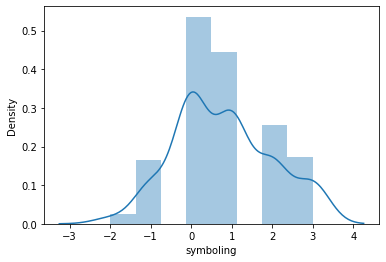

normalized-losses
0.848205953606264


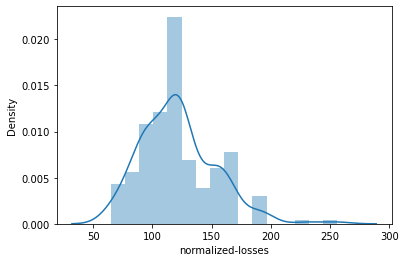

width
0.9140400320504322


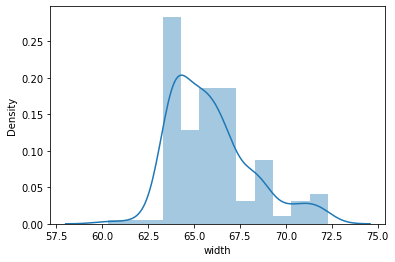

height
0.013839962443639326


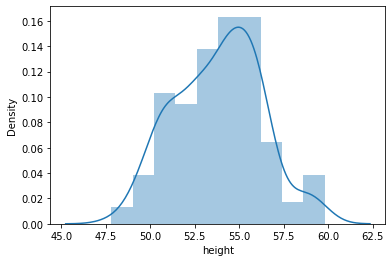

engine-size
2.0541257626466156


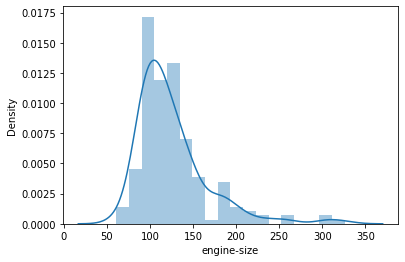

horsepower
1.5556576549504106


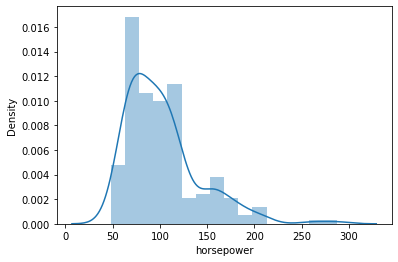

city-mpg
0.5999073033714895


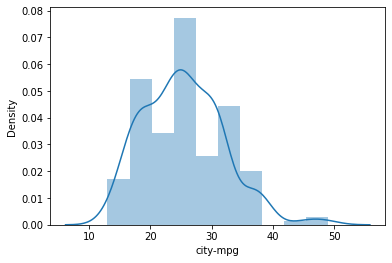

highway-mpg
0.4760310091695327


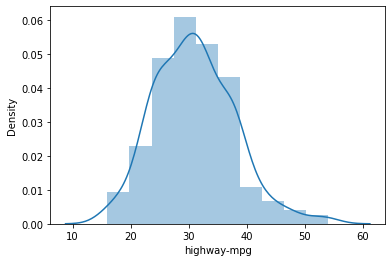

price
1.8166794702973463


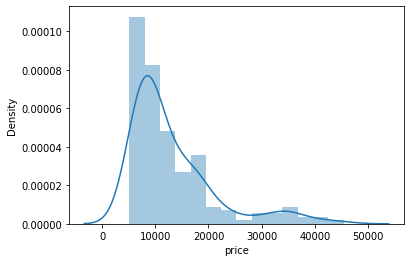

In [29]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    sns.distplot(df[col])
    plt.show()

In [33]:
df.corr()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.447922,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.447922,1.000000,0.066622,-0.368540,0.090258,0.183385,-0.212276,-0.168904,0.129973
width,-0.272388,0.066622,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.368540,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.090258,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.183385,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.212276,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168904,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.129973,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


In [34]:
np.log(-5)

nan

In [35]:
np.sqrt(-3)

nan

In [36]:
df1=df.corr().style.background_gradient()

In [37]:
skew(df["normalized-losses"])

0.848205953606264

In [38]:
df["normalized-losses"]=np.log(df["normalized-losses"])

In [39]:
skew(df["normalized-losses"])

0.018468899462087518

symboling
0.21386866184357742


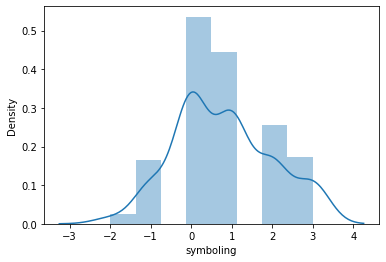

normalized-losses
0.018468899462087518


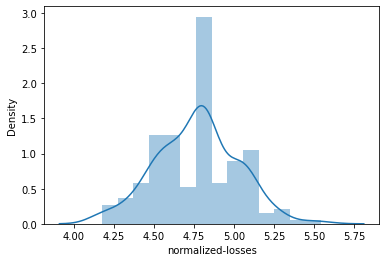

width
0.9140400320504322


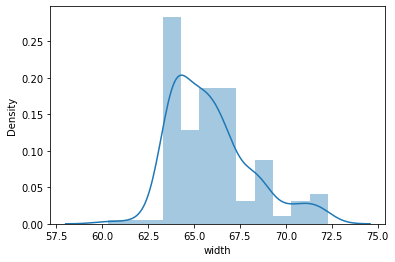

height
0.013839962443639326


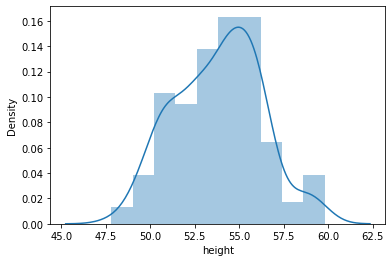

engine-size
2.0541257626466156


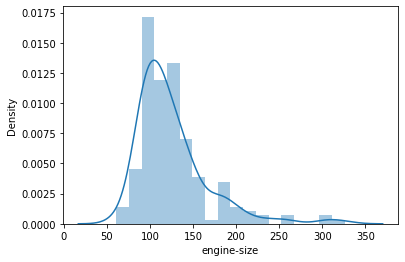

horsepower
1.5556576549504106


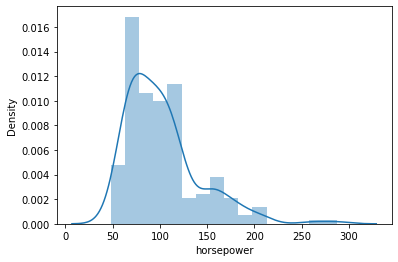

city-mpg
0.5999073033714895


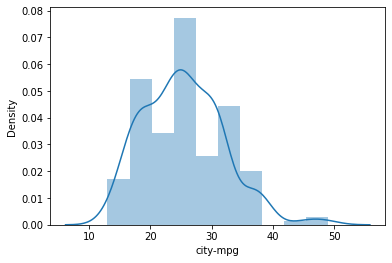

highway-mpg
0.4760310091695327


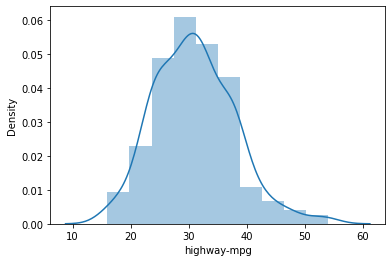

price
1.8166794702973463


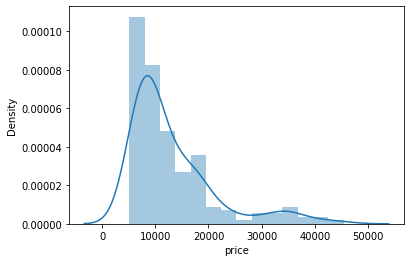

In [37]:
for col in df[colname]:
    print(col)
    print(skew(df[col]))
    
    sns.distplot(df[col])
    plt.show()

In [38]:
df.corr().style.background_gradient()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
symboling,1.000000,0.469376,-0.272388,-0.521495,-0.153671,0.027074,0.007189,0.084238,-0.095905
normalized-losses,0.469376,1.000000,0.075228,-0.379698,0.103697,0.195058,-0.215628,-0.168380,0.142736
width,-0.272388,0.075228,1.000000,0.296011,0.735112,0.643906,-0.641401,-0.677911,0.730503
height,-0.521495,-0.379698,0.296011,1.000000,0.096041,-0.078245,-0.078815,-0.142926,0.147010
engine-size,-0.153671,0.103697,0.735112,0.096041,1.000000,0.803956,-0.642711,-0.667078,0.869638
horsepower,0.027074,0.195058,0.643906,-0.078245,0.803956,1.000000,-0.797166,-0.761009,0.768921
city-mpg,0.007189,-0.215628,-0.641401,-0.078815,-0.642711,-0.797166,1.000000,0.970113,-0.680412
highway-mpg,0.084238,-0.168380,-0.677911,-0.142926,-0.667078,-0.761009,0.970113,1.000000,-0.704846
price,-0.095905,0.142736,0.730503,0.147010,0.869638,0.768921,-0.680412,-0.704846,1.000000


# Handling Categorical data

In [39]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [40]:
df["fuel-type"]

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 194, dtype: object

In [41]:
df["fuel-type"].value_counts()

gas       174
diesel     20
Name: fuel-type, dtype: int64

In [42]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [41]:
pd.get_dummies(df["make"])

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
ohe = OneHotEncoder()

In [44]:
ohe.fit_transform(df[["make"]]).toarray()

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

# Label Encoding

In [52]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit_transform(df["make"])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,  9,  9,
        9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12,
       12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14,
       15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18,
       18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 21, 21])

In [53]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,4.804021,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,4.804021,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,5.099866,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,5.099866,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,4.553877,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,4.553877,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,4.553877,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


# Ordinal Encoder

In [54]:
from sklearn.preprocessing import OrdinalEncoder

In [55]:
oe = OrdinalEncoder()

In [57]:
oe.fit_transform(df[["make","body-style"]])

array([[ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  2.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  3.],
       [ 1.,  2.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 2.,  3.],
       [ 3.,  2.],
       [ 3.,  2.],
       [ 3.,  3.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  2.],
       [ 4.,  3.],
       [ 4.,  3.],
       [ 4.,  3.],
       [ 4.,  4.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  3.],
       [ 5.,  4.],
       [ 5.,  2.],
       [ 5.,  2.],
       [ 5.,  3.],
       [ 5.,  3.],
       [ 5.,  3.],
       [ 6.,  3.],
       [ 6.,  3.],
       [ 6.,  2.],
       [ 7.,  3.],
       [ 7.,  3.],
       [ 7.,  3.],
       [ 8.,  2.],
       [ 8.,  2.],
       [ 8.,  2.],
       [ 8.,  3.],
       [ 8.,  3.],
       [ 8.,

In [59]:
catcol = df.select_dtypes(object).columns

In [60]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

df[catcol]=oe.fit_transform(df[catcol])

In [61]:
df

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,13495
1,3,4.804021,0.0,1.0,0.0,2.0,0.0,64.1,48.8,0.0,130,111.0,21,27,16500
2,1,4.804021,0.0,1.0,2.0,2.0,0.0,65.5,52.4,5.0,152,154.0,19,26,16500
3,2,5.099866,1.0,1.0,3.0,1.0,0.0,66.2,54.3,3.0,109,102.0,24,30,13950
4,2,5.099866,1.0,1.0,3.0,0.0,0.0,66.4,54.3,3.0,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,3.0,141,114.0,23,28,16845
201,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.8,55.5,3.0,141,160.0,19,25,19045
202,-1,4.553877,21.0,1.0,3.0,2.0,0.0,68.9,55.5,5.0,173,134.0,18,23,21485
203,-1,4.553877,21.0,0.0,3.0,2.0,0.0,68.9,55.5,3.0,145,106.0,26,27,22470


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          194 non-null    int64  
 1   normalized-losses  194 non-null    float64
 2   make               194 non-null    float64
 3   fuel-type          194 non-null    float64
 4   body-style         194 non-null    float64
 5   drive-wheels       194 non-null    float64
 6   engine-location    194 non-null    float64
 7   width              194 non-null    float64
 8   height             194 non-null    float64
 9   engine-type        194 non-null    float64
 10  engine-size        194 non-null    int64  
 11  horsepower         194 non-null    float64
 12  city-mpg           194 non-null    int64  
 13  highway-mpg        194 non-null    int64  
 14  price              194 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 24.2 KB
